# Colombian Coffee Production Prediction

## Regularization Analysis

This sript will retrieve information from the .csv files saved on step 4 ([Time Series Analysis](04_TimeSeriesAnalysis.ipynb)) and perform a full analysis on all variables that have been analyzed so far.

If steps **0** ([Loading Data](00_LoadingData.ipynb)) and **4** ([Time Series Analysis](04_TimeSeriesAnalysis.ipynb)) have already been executed **once** it will not be necessary to execute them again.  For analysis purposes, it's also assumed tht steps 1-5 have also been executed for a better understanding.

In [17]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import Ridge, Lasso

**Load Clean Monthly Data**

In [79]:
pd.set_option('display.max_rows',50)

coffee_df=pd.read_csv('../csv/FINAL_coffee_mth_final.csv', index_col=0)
coffee_df.columns

Index(['Produccion', 'avg_precip', 'avg_tmp', 'avg_wind', 'dew_point',
       'avg_humidity', 'colombia_price', 'brasil_price', 'others_price',
       'vol_export', 'trm', 'Intercept', 'month[T.January]',
       'month[T.February]', 'month[T.March]', 'month[T.May]', 'month[T.June]',
       'month[T.July]', 'month[T.August]', 'month[T.September]',
       'month[T.October]', 'month[T.November]', 'month[T.December]',
       'prev_month'],
      dtype='object')

### Full Variable Analysis

**Separate Independent Variables from Dependent (Production)**

In [7]:
y = coffee_df['Produccion']
x = coffee_df.iloc[:,1:]
x.head()

,avg_precip,avg_tmp,avg_wind,dew_point,avg_humidity,colombia_price,brasil_price,others_price,vol_export,trm,...,month[T.March],month[T.May],month[T.June],month[T.July],month[T.August],month[T.September],month[T.October],month[T.November],month[T.December],prev_month
0,0.0,76,1,64,70.153846,204.71,124.57,157.86,590.0,1951.723934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515.0
1,0.0,75,1,65,68.500000,205.71,126.21,164.50,576.0,1908.991973,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,648.0
2,0.0,73,1,66,78.375000,199.50,125.71,169.24,588.0,1937.448991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,629.0
3,0.0,74,1,66,76.703704,200.33,127.32,173.28,576.0,1983.593230,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,647.0
4,0.0,72,0,65,79.150000,224.49,143.20,190.90,648.0,1926.845988,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,822.0


**Split data into train (70%) and test (30%) sets, generate a first model**

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Produccion   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     22.80
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           2.55e-17
Time:                        19:02:26   Log-Likelihood:                -387.27
No. Observations:                  67   AIC:                             820.5
Df Residuals:                      44   BIC:                             871.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
avg_precip          -469.6813    314.232     -1.495      0.142   -1102.974     163.611
avg_tmp              -14.0827     27.242     -0.517      0.608     -68.984      40.819
avg_wind             114.4400     38.680      2.959      0.005      36.486     192.394
dew_point             -2.9529     27.175     -0.109      0.914     -57.720      51.814
avg_humidity          -6.6200      9.109     -0.727      0.471     -24.978      11.738
colombia_price         1.0702      2.435      0.439      0.662      -3.838       5.978
brasil_price          -0.2722      1.688     -0.161      0.873      -3.675       3.130
others_price          -2.0457      3.318     -0.617      0.541      -8.733       4.642
vol_export             0.5426      0.121      4.503      0.000       0.300       0.785
trm                    0.0796      0.053      1.491      0.143      -0.028       0.187
Intercept           1865.4133   1949.283      0.957      0.344   -2063.109    5793.936
month[T.January]     -35.0865     68.685     -0.511      0.612    -173.512     103.339
month[T.February]     -8.9790     64.655     -0.139      0.890    -139.282     121.324
month[T.March]       -76.5519     64.016     -1.196      0.238    -205.568      52.465
month[T.May]         130.8117     58.828      2.224      0.031      12.251     249.373
month[T.June]        108.9768     72.008      1.513      0.137     -36.146     254.100
month[T.July]        163.0711     66.970      2.435      0.019      28.102     298.040
month[T.August]      -91.7419     63.975     -1.434      0.159    -220.674      37.190
month[T.September]   -40.1478     66.286     -0.606      0.548    -173.739      93.443
month[T.October]     126.4463     61.446      2.058      0.046       2.611     250.282
month[T.November]     82.1320     68.390      1.201      0.236     -55.700     219.964
month[T.December]     89.4173     69.759      1.282      0.207     -51.172     230.007
prev_month             0.1796      0.125      1.439      0.157      -0.072       0.431
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.114
Skew:                          -0.245   Prob(JB):                        0.347
Kurtosis:                       3.719   Cond. No.                     4.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:**
* R2 has a better looking value! (0.919), as well as Adj-R2 (0.879)
* Some P Values don't look very good: [0.137, 0,914], but there are same that do! [0, 0.046]
* Skew is close to 0 (0.245)
* Kurtosis is higher than other times (3.719 < 7)

**Residual Plot**

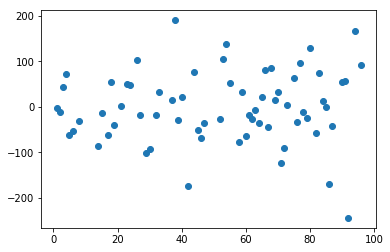

In [9]:
fit.resid.plot(style='o', figsize=(6,4))

In [10]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9193441575238942

Same R2 value that stats_model generated, mode seems accurate again!

In [11]:
lr.score(X_test, y_test)

0.798452103798877

**Compare Predicted values to real values from test set**

In [12]:
lr.predict(X_test)

array([1302.92930813,  650.83399175,  682.04347505, 1239.26162198,
        757.09006104,  787.76483765,  892.04807799,  805.02620842,
       1042.38356849, 1143.29116739, 1120.57286291,  706.10157191,
        756.16135466,  877.5802406 ,  677.38909895,  981.67152584,
        519.54943446, 1082.82465048, 1117.34914207,  819.64381679,
       1046.38560452, 1023.07217025,  785.85666559,  873.26669643,
        716.25338454,  717.2866145 ,  713.67428189,  992.20016361,
        962.27867558,  631.86684751])

In [13]:
list(y_test)

[1373.0,
 656.0,
 519.0,
 1653.0,
 779.0,
 832.0,
 828.0,
 735.0,
 1031.0,
 1304.0,
 1043.0,
 860.0,
 714.0,
 908.0,
 648.0,
 1164.0,
 576.0,
 1115.0,
 1131.0,
 904.0,
 979.0,
 1101.0,
 877.0,
 874.0,
 764.0,
 471.0,
 625.0,
 1049.0,
 1050.0,
 530.0]

**Conclusions**

Model seems accurate, but still a has some overfit. P-values will be saved in order to sort variables in order of importance for this model

In [14]:
ols_df= pd.DataFrame(fit.pvalues)
ols_df.rename(columns={0:'p_value'}, inplace=True)
ols_df = ols_df.sort_values('p_value', ascending=True).reset_index()
ols_df['ols_ord']=ols_df.index
ols_df.rename(columns={'index':'Feature'}, inplace=True)
ols_df

,Feature,p_value,ols_ord
0,vol_export,0.000049,0
1,avg_wind,0.004958,1
2,month[T.July],0.019015,2
3,month[T.May],0.031356,3
4,month[T.October],0.045558,4
5,month[T.June],0.137331,5
6,avg_precip,0.142132,6
7,trm,0.143010,7
8,prev_month,0.157127,8
9,month[T.August],0.158631,9


### Regularization Using RIDGE

In [16]:
k_folds = model_selection.KFold(n_splits=15, shuffle=True)
alphas = np.logspace(-5,1, num=4)

**Plot coeficient values with several alpla values to get the best value for Ridge Algorithm**

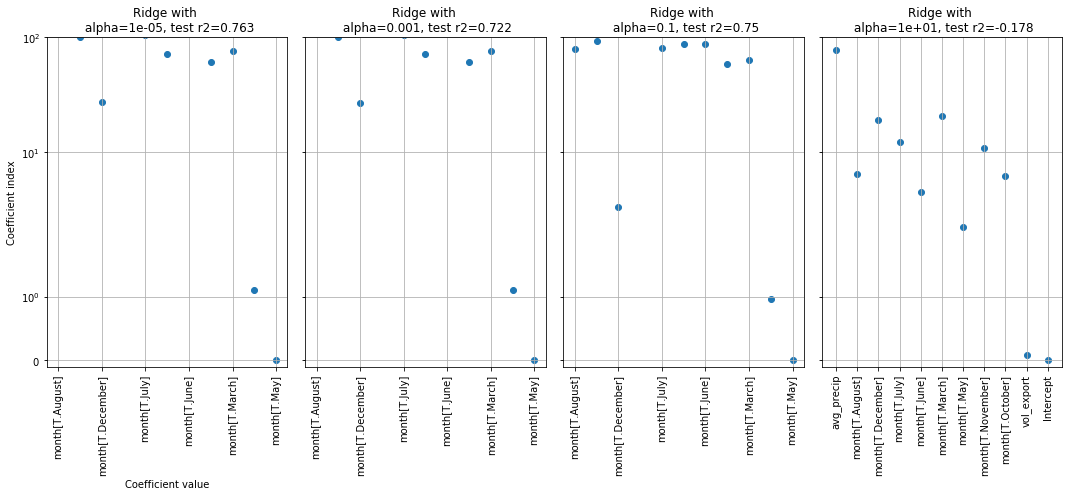

In [76]:
alphas = np.logspace(-5,1, num=4)
fig, axes = plt.subplots(1,len(alphas), figsize=(15, 7), sharey=True)
    
for i, alpha in enumerate(alphas):
    ax = axes.flat[i]
    est = linear_model.Ridge(alpha=alpha, normalize=True)
    cv_result = model_selection.cross_validate(est, X=x, y=y, cv=k_folds, return_train_score=True)
    est.fit(X_train, y_train)
    coefs = np.abs(est.coef_)
    r2 = np.mean(cv_result["test_score"])
    ax.scatter(np.arange(len(coefs)), coefs)
    locs, labels = plt.xticks(np.arange(len(coefs)), x.columns, rotation=90)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(f"Ridge with \n alpha={alpha:.2}, test r2={r2:.3}")
    ax.grid()

ax = axes.flat[0]
ax.set_yscale("symlog")
ax.set_ylim((-.1, 1e2))
ax.set_ylabel("Coefficient index")
ax.set_xlabel("Coefficient value")

plt.tight_layout()
plt.savefig('../graphs/Regularization_Ridge.png')

**Create Model with optimal alpha (a=0.1, R2=0.802) and list coeficients**

In [49]:
est = linear_model.Ridge(alpha=0.1, normalize=True)
cv_result = model_selection.cross_validate(est, X=x, y=y, cv=k_folds, return_train_score=True)
est.fit(X_train, y_train)

#Get each vaiable name with its coeficient
coef_list=sorted(zip(x.columns, np.abs(est.coef_)), key=lambda tup: tup[1], reverse=True)
coef_list

[('avg_precip', 456.4532178147386),
 ('month[T.July]', 122.52400865602974),
 ('month[T.October]', 106.0892383566462),
 ('month[T.March]', 95.81723340909123),
 ('avg_wind', 93.73411451711515),
 ('month[T.May]', 92.89390749985911),
 ('month[T.December]', 87.72987142053128),
 ('month[T.August]', 84.43104371261518),
 ('month[T.June]', 71.87015323155761),
 ('month[T.November]', 66.43924527402052),
 ('month[T.September]', 48.18588396215861),
 ('month[T.January]', 41.33785555973713),
 ('month[T.February]', 9.63075422833528),
 ('avg_tmp', 8.585361127980834),
 ('dew_point', 6.211439564051088),
 ('avg_humidity', 4.2279310122864056),
 ('brasil_price', 0.5816174140277932),
 ('colombia_price', 0.4937267343581043),
 ('vol_export', 0.4065197786178496),
 ('others_price', 0.3685138650127578),
 ('prev_month', 0.20521563182291247),
 ('trm', 0.07793484520200758),
 ('Intercept', 0.0)]

**Sort variables by coeficient, this will give us "order of importance" for Ridge**

In [51]:
ridge_df = pd.DataFrame(coef_list)
ridge_df = ridge_df.sort_values(1)
ridge_df['ridge_ord']=ridge_df.index
ridge_df

,0,1,ridge_ord
22,Intercept,0.000000,22
21,trm,0.077935,21
20,prev_month,0.205216,20
19,others_price,0.368514,19
18,vol_export,0.406520,18
17,colombia_price,0.493727,17
16,brasil_price,0.581617,16
15,avg_humidity,4.227931,15
14,dew_point,6.211440,14
13,avg_tmp,8.585361,13


### Regularization Using LASSO

**Plot coeficient values with several alpla values to get the best value for Lasso Algorithm**

/Users/monita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/monita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/monita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/monita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

Text(0.5,0,'Coefficient value')

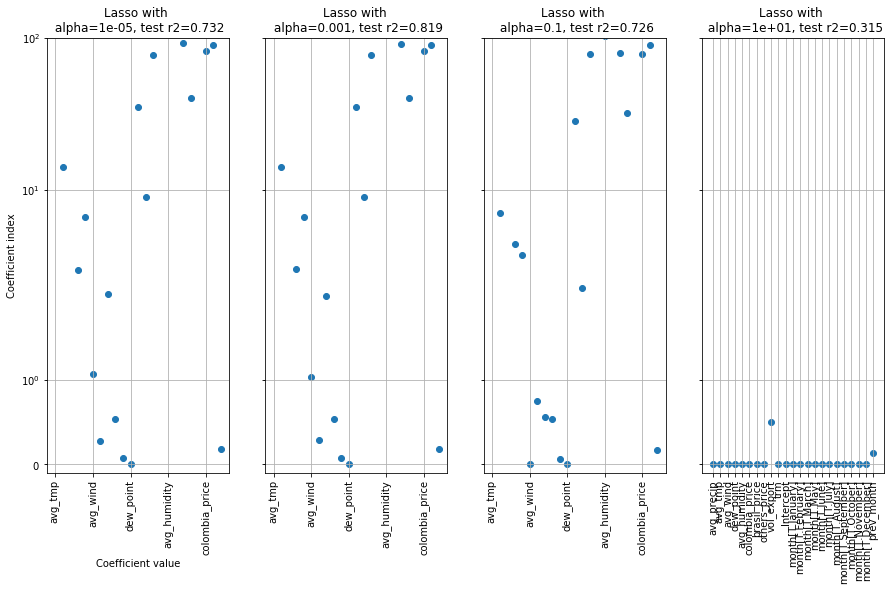

In [55]:
fig, axes = plt.subplots(1,len(alphas), figsize=(15, 8), sharey=True)
for i, alpha in enumerate(alphas):
    ax = axes.flat[i]
    est = linear_model.Lasso(alpha=alpha, normalize=True)
    cv_result = model_selection.cross_validate(
    est, X=x, y=y, cv=k_folds, return_train_score=True)
    est.fit(X_train, y_train)
    coefs = np.abs(est.coef_)
    r2 = np.mean(cv_result["test_score"])
    ax.scatter(np.arange(len(coefs)), coefs)
    locs, labels = plt.xticks(np.arange(len(coefs)), x.columns, rotation=90)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(f"Lasso with \n alpha={alpha:.2}, test r2={r2:.3}")
    ax.grid()

ax = axes.flat[0]
ax.set_yscale("symlog")
ax.set_ylim((-.1, 1e2))
ax.set_ylabel("Coefficient index")
ax.set_xlabel("Coefficient value")

plt.savefig('../graphs/Regularization_Lasso.png')

**Create Model with optimal alpha (a=0.001, R2=0.819) and list coeficients**

In [56]:
est = linear_model.Lasso(alpha=0.001, normalize=True)
cv_result = model_selection.cross_validate(est, X=x, y=y, cv=k_folds, return_train_score=True)
est.fit(X_train, y_train)
coef_list=sorted(zip(x.columns, np.abs(est.coef_)), key=lambda tup: tup[1], reverse=True)
coef_list

[('avg_precip', 471.5909925626857),
 ('month[T.July]', 162.93621016338227),
 ('month[T.May]', 130.49645315817017),
 ('month[T.October]', 126.28854656831132),
 ('avg_wind', 114.12622353204107),
 ('month[T.June]', 108.7278339938398),
 ('month[T.August]', 91.48426928643943),
 ('month[T.December]', 89.43131075554896),
 ('month[T.November]', 82.06741951187644),
 ('month[T.March]', 76.64530835006113),
 ('month[T.September]', 39.953253820804356),
 ('month[T.January]', 35.03545452652637),
 ('avg_tmp', 13.9792041427352),
 ('month[T.February]', 8.877317459612291),
 ('avg_humidity', 6.560522024879688),
 ('dew_point', 2.978750293931941),
 ('others_price', 1.9974231032687455),
 ('colombia_price', 1.0321169508926782),
 ('vol_export', 0.5423859821449674),
 ('brasil_price', 0.2854770493096765),
 ('prev_month', 0.17910135903870605),
 ('trm', 0.079175837998148),
 ('Intercept', 0.0)]

**Sort variables by coeficient, this will give us "order of importance" for Lasso**

In [58]:
lasso_df = pd.DataFrame(coef_list)
lasso_df = lasso_df.sort_values(1)
lasso_df['lasso_ord']=lasso_df.index
lasso_df

,0,1,lasso_ord
22,Intercept,0.000000,22
21,trm,0.079176,21
20,prev_month,0.179101,20
19,brasil_price,0.285477,19
18,vol_export,0.542386,18
17,colombia_price,1.032117,17
16,others_price,1.997423,16
15,dew_point,2.978750,15
14,avg_humidity,6.560522,14
13,month[T.February],8.877317,13


### Regularization Using ELASTIC NET

**Plot coeficient values with several alpla values to get the best value for Elastic Net Algorithm**

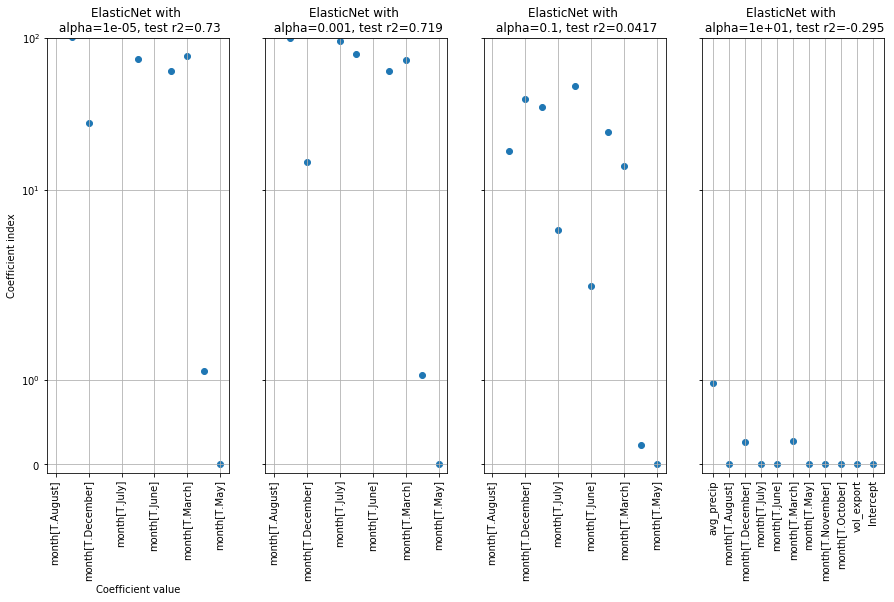

In [77]:
fig, axes = plt.subplots(1,len(alphas), figsize=(15, 8), sharey=True)
for i, alpha in enumerate(alphas):
    ax = axes.flat[i]
    est = linear_model.ElasticNet(alpha=alpha, normalize=True)
    cv_result = model_selection.cross_validate(
    est, X=x, y=y, cv=k_folds, return_train_score=True)
    est.fit(X_train, y_train)
    coefs = np.abs(est.coef_)
    r2 = np.mean(cv_result["test_score"])
    ax.scatter(np.arange(len(coefs)), coefs)
    locs, labels = plt.xticks(np.arange(len(coefs)), x.columns, rotation=90)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(f"ElasticNet with \n alpha={alpha:.2}, test r2={r2:.3}")
    ax.grid()

ax = axes.flat[0]
ax.set_yscale("symlog")
ax.set_ylim((-.1, 1e2))
ax.set_ylabel("Coefficient index")
ax.set_xlabel("Coefficient value")

plt.savefig('../graphs/Regularization_ElasticNet.png')

**Create Model with optimal alpha (a=0.001, R2=0.814) and list coeficients**

In [64]:
est = linear_model.ElasticNet(alpha=0.001, normalize=True)
cv_result = model_selection.cross_validate(est, X=x, y=y, cv=k_folds, return_train_score=True)
est.fit(X_train, y_train)

coef_list = sorted(zip(x.columns, np.abs(est.coef_)), key=lambda tup: tup[1], reverse=True)
coef_list

[('avg_precip', 513.1833360234881),
 ('month[T.July]', 140.6226340195259),
 ('month[T.October]', 116.10500073689909),
 ('month[T.May]', 110.18318977705782),
 ('avg_wind', 99.88040372818323),
 ('month[T.March]', 88.93940506143129),
 ('month[T.August]', 88.42258273135685),
 ('month[T.December]', 87.44289117132013),
 ('month[T.June]', 85.7070599521964),
 ('month[T.November]', 74.78165211757886),
 ('month[T.September]', 43.78842471991158),
 ('month[T.January]', 41.28776869277681),
 ('avg_tmp', 10.846616258175276),
 ('month[T.February]', 9.744355143771521),
 ('avg_humidity', 4.919450353298927),
 ('dew_point', 4.8822796847184184),
 ('brasil_price', 0.6361206744589514),
 ('vol_export', 0.47341930549754196),
 ('others_price', 0.44397047780143256),
 ('colombia_price', 0.2976522125958146),
 ('prev_month', 0.19098788159982177),
 ('trm', 0.07303589261453336),
 ('Intercept', 0.0)]

**Sort variables by coeficient, this will give us "order of importance" for Elastic Net**

In [65]:
elastic_df = pd.DataFrame(coef_list)
elastic_df = elastic_df.sort_values(1)
elastic_df['elastic_ord']=elastic_df.index
elastic_df

,0,1,elastic_ord
22,Intercept,0.000000,22
21,trm,0.073036,21
20,prev_month,0.190988,20
19,colombia_price,0.297652,19
18,others_price,0.443970,18
17,vol_export,0.473419,17
16,brasil_price,0.636121,16
15,dew_point,4.882280,15
14,avg_humidity,4.919450,14
13,month[T.February],9.744355,13


### Join DataFrames to see Order of Importance

In [66]:
important_df = pd.merge(ridge_df, lasso_df, how='inner', on=0)
important_df = pd.merge(important_df, elastic_df, how='inner', on=0)
important_df.rename(columns={0:'Feature'}, inplace=True)
important_df = pd.merge(important_df, ols_df, how='inner', on='Feature')
important_df.index=important_df['Feature']

important_df = important_df[['ols_ord', 'ridge_ord', 'lasso_ord', 'elastic_ord']]
important_df.sort_index(inplace=True)
important_df

,ols_ord,ridge_ord,lasso_ord,elastic_ord
Feature,,,,
Intercept,13,22,22,22
avg_humidity,14,15,14,14
avg_precip,6,0,0,0
avg_tmp,17,13,12,12
avg_wind,1,4,4,4
brasil_price,20,16,19,16
colombia_price,19,17,17,19
dew_point,22,14,15,15
month[T.August],9,7,6,6


**Plot Importance of variables by Algorithm (HeatMap)**

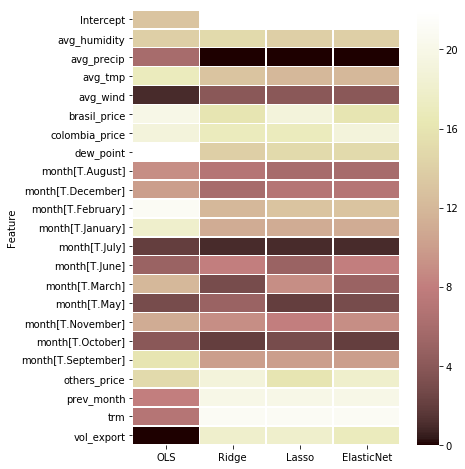

In [78]:
plt.subplots(figsize=(6, 8))
labels=['OLS', 'Ridge', 'Lasso', 'ElasticNet']
sns.heatmap(important_df, annot=False, linewidths=.5, cmap='pink', xticklabels=labels)

plt.savefig('../graphs/Regularization_ImportanceHeatMap.png')

### Final Model

According to the analysis made to the importance of variables to each of the Algortihms we are going to buils a Model using:
- **Weather:** Precipitations (Seem to be the only significant variable that influences volume)
- **Competidor Countries:** None (No variable seem important in this analysis)
- **Month of Hasvest:** March, May, June, July, August as well as October, november and December, seem to be the most influent months for Production
- **Economical Info:** Although not very important by the Regularization Algorithms, our previous analysis and the normal LR show Exporting Volume as an influent feature

In [69]:
#Separate Dependent (Produccion) from Independent Variables
y = coffee_df['Produccion']
x = coffee_df[['avg_precip','month[T.August]', 'month[T.December]', 'month[T.July]',
              'month[T.June]', 'month[T.March]', 'month[T.May]', 'month[T.November]',   
               'month[T.October]', 'vol_export', 'Intercept']]
x.head()

,avg_precip,month[T.August],month[T.December],month[T.July],month[T.June],month[T.March],month[T.May],month[T.November],month[T.October],vol_export,Intercept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,590.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,576.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,588.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,576.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,648.0,1.0


**Split data into train (70%) and test (30%) sets, generate a first model**

In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Produccion   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     35.08
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.56e-20
Time:                        19:45:59   Log-Likelihood:                -404.30
No. Observations:                  67   AIC:                             830.6
Df Residuals:                      56   BIC:                             854.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
avg_precip         -265.3276    248.531     -1.068      0.290    -763.195     232.539
month[T.August]     101.6963     70.078      1.451      0.152     -38.687     242.080
month[T.December]   -27.4734     56.293     -0.488      0.627    -140.242      85.296
month[T.July]       243.5118     49.359      4.934      0.000     144.635     342.389
month[T.June]       105.5366     49.279      2.142      0.037       6.820     204.253
month[T.March]      -72.1185     51.865     -1.390      0.170    -176.017      31.780
month[T.May]        124.1331     69.322      1.791      0.079     -14.735     263.002
month[T.November]    60.6636     49.303      1.230      0.224     -38.102     159.429
month[T.October]     76.0892     46.667      1.630      0.109     -17.397     169.575
vol_export            1.1106      0.072     15.408      0.000       0.966       1.255
Intercept           -33.3657     59.593     -0.560      0.578    -152.744      86.013
==============================================================================
Omnibus:                        7.218   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.027   Jarque-Bera (JB):               10.366
Skew:                           0.319   Prob(JB):                      0.00561
Kurtosis:                       4.818   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Analysis:**
* R2 has improved a lot! (0.862), as well as Adj-R2 (0.838)
* P Values have improved for all variables: [0, 0,627]
* Skew is close to 0 (0.319)

**Residual Plot**

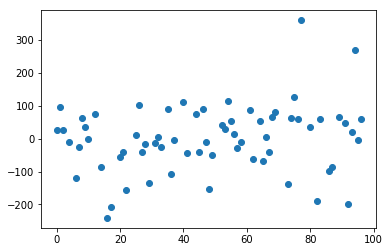

In [71]:
fit.resid.plot(style='o', figsize=(6,4))

In [72]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8623440188200371

Same R2 value, model is accurate, and quite predictive:

**Test Score**

In [73]:
lr.score(X_test, y_test)

0.7890949863928683

In [74]:
lr.predict(X_test)

array([1021.50634595,  691.13538896,  730.47442084,  775.65598896,
       1402.9393286 ,  749.35466202,  489.7280628 , 1175.90691798,
       1261.82498498,  494.35775479, 1077.87672931,  840.14463388,
        568.10327578,  698.93505573,  889.8347808 , 1083.71026195,
       1274.34414716,  920.26825612,  908.09199545, 1064.16670489,
       1127.03259014,  705.19877304,  588.18296758, 1469.10550105,
       1456.31811724, 1162.66246684, 1122.60230303, 1188.86413564,
       1156.28190675,  998.26694323])

In [75]:
#Compare
list(y_test)

[937.0,
 860.0,
 822.0,
 904.0,
 1294.0,
 673.0,
 459.0,
 1136.0,
 1454.0,
 466.0,
 770.0,
 832.0,
 535.0,
 970.0,
 787.0,
 1049.0,
 1293.0,
 779.0,
 908.0,
 1034.0,
 1029.0,
 565.0,
 571.0,
 1189.0,
 1653.0,
 1096.0,
 1088.0,
 1165.0,
 1020.0,
 1050.0]

**Conclusions**

Coffee Production, instead of was was believed in the beginning of this analysis, doesn't seem to be affected by weather conditions.  Coffee will grow in any temperature and humidity % inside the area of observations.  Although Protection against rain MUST be preserved.

Economical facts from international competidors such as Brazil, Vietnam, Peru and Mexico, don't seem to affect either.  The production of these countries, along with Colombia, seem to be influenced all in paralell by other external features not included in this analysis.

Month of Harvest seem to be the most important feature in Coffee Production.  Periods of May until August as well as October until December seem to have the highest impact.